# Практическая работа №11

### Задание:
Создать модель классификации фильмов по жанров используя тексты описания.

### Решение:
1. Набор данных загрузить из файлов tmdb_5000_movies.csv.

In [2]:
import pandas as pd

df = pd.read_csv('./data/tmdb_5000_movies.csv')

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


2. Изучить данные:
Возможно, у некоторых фильмов не указаны жанры или тексты описаний (их нужно исключить).

In [4]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
df = df.dropna(subset=['overview', 'genres'])

In [6]:
# Drop from df rows where len of genres = 0
print(len(df))
df = df[df['genres'].apply(lambda x: len(eval(x)) > 0)]
print(len(df))

4800
4772


In [7]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3065
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  816
title                      0
vote_average               0
vote_count                 0
dtype: int64

Изучите, какие жанры сколько раз представлены в наборе (вывести график).

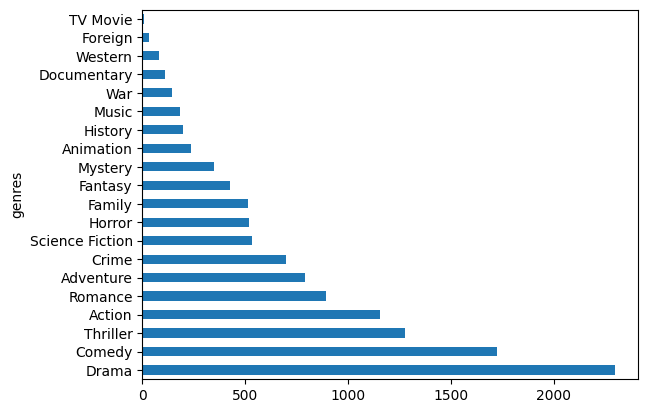

In [8]:
import matplotlib.pyplot as plt

genres = df['genres'].apply(lambda x: [i['name'] for i in eval(x)])
genres = genres.explode()
genres.value_counts().plot.barh()
plt.show()

Изучите, сколько жанров представлены в фильмах (вывести график).

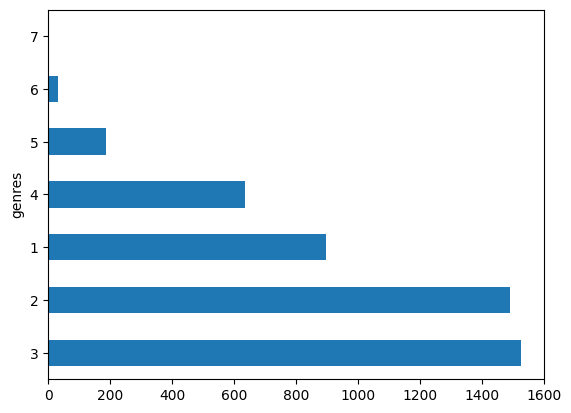

In [9]:
counts = df['genres'].apply(lambda x: len(eval(x)))
counts.value_counts().plot.barh()
plt.show()

Изучите часто встречаемые слова для каждого жанра (вывести облака слов).

In [10]:
from wordcloud import WordCloud

genres = df['genres'].apply(lambda x: [i['name'] for i in eval(x)])
df['genres'] = genres
genres = genres.explode()
genres = genres.value_counts()
genres = genres[genres > 100]
genres = genres.index.tolist()

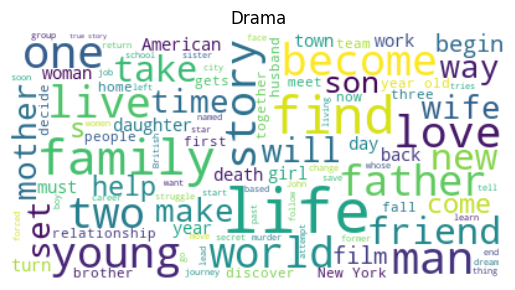

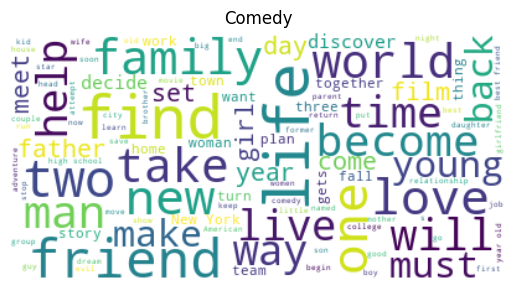

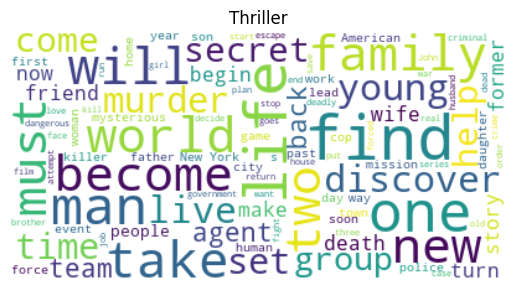

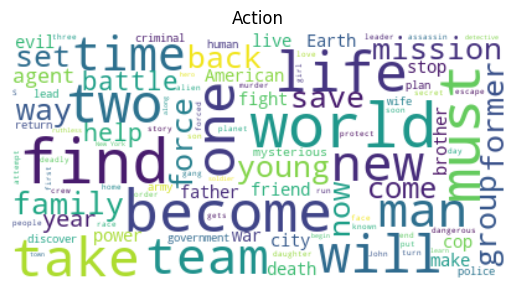

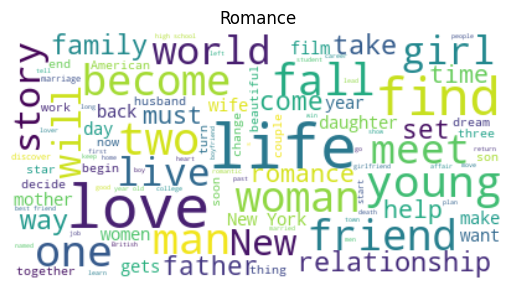

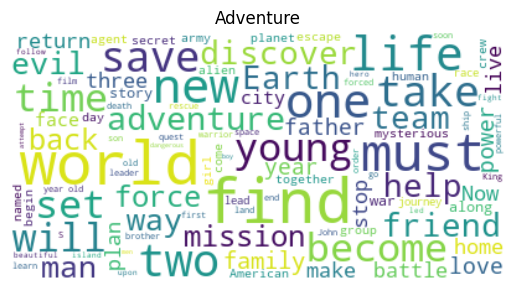

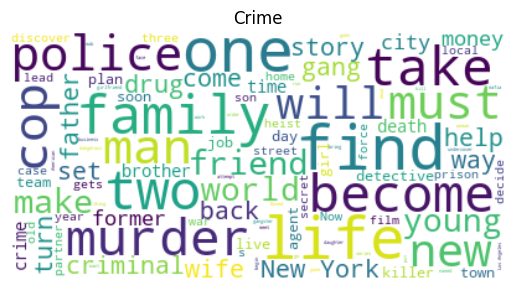

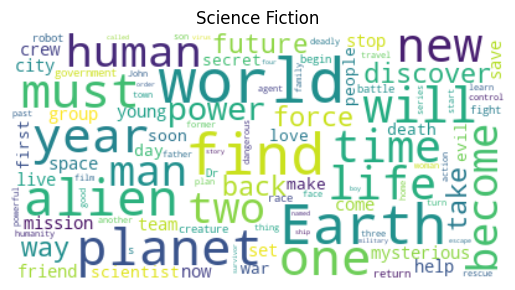

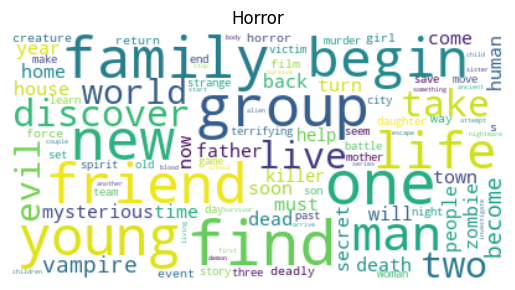

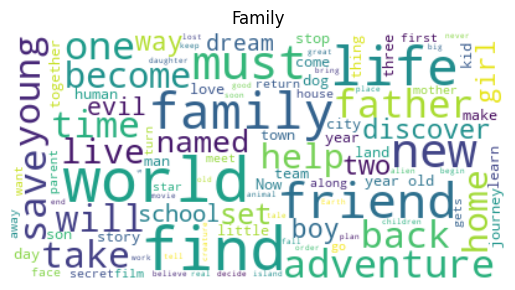

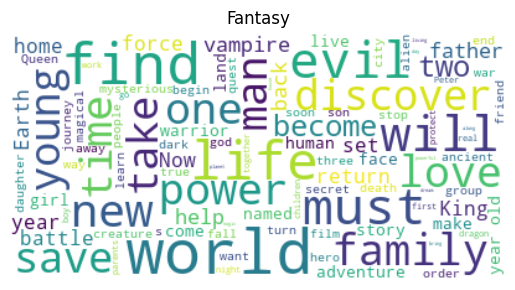

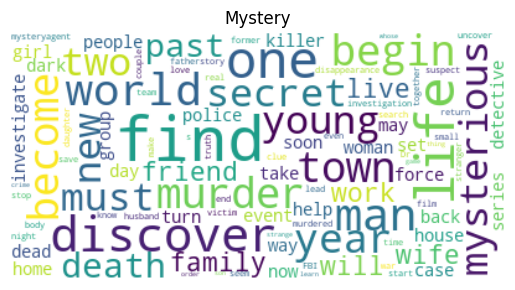

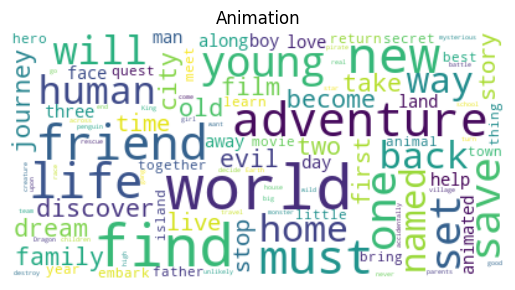

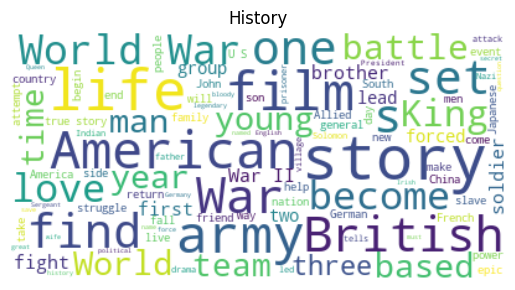

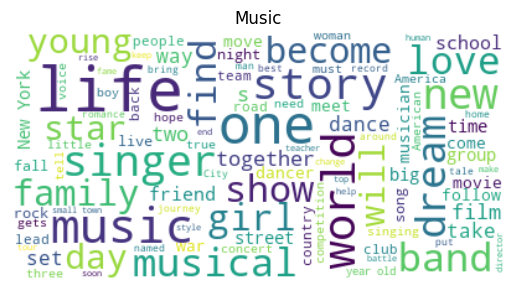

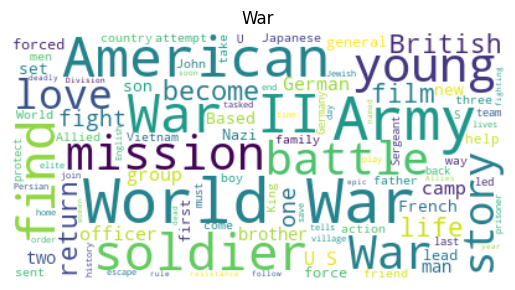

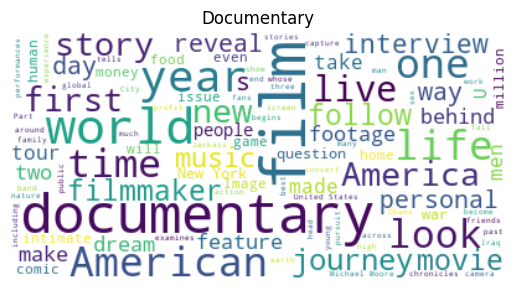

In [11]:
for genre in genres:
    text = df[df['genres'].apply(lambda x: genre in x)]['overview'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(genre)
    plt.axis("off")
    plt.show()

3. Предобработка данных. В качестве данных – тексты описаний фильмов (overview). 
Подготовить данные для tf-idf. Разделить выборку на обучающую и тестирующую.

In [12]:
def preprocess(text, lemmatizer):
    from nltk.tokenize import sent_tokenize
    from string import punctuation
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    sentences = sent_tokenize(text)
    # Lower case
    sentences = [sentence.lower() for sentence in sentences]
    # Remove punctuation
    sentences = [
        "".join(c for c in sentence if c not in punctuation) for sentence in sentences
    ]
    # Tokenize words
    sentences = [word_tokenize(sentence) for sentence in sentences]
    # Remove stopwords
    stop_words = stopwords.words("english")
    sentences = [
        [word for word in sentence if word not in stop_words] for sentence in sentences
    ]
    # Remove links
    sentences = [
        [word for word in sentence if not word.startswith("http")]
        for sentence in sentences
    ]
    # Remove words with length less than 3
    sentences = [
        [word for word in sentence if len(word) >= 3] for sentence in sentences
    ]
    # Lemmatize
    sentences = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in sentences]
    words = " ".join([" ".join(sentence) for sentence in sentences])
    return words


In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['overview_processed'] = df['overview'].apply(lambda x: preprocess(x, lemmatizer))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df['overview_processed'], df['genres'], test_size=0.2, random_state=42)

## 1 подход: Для каждого жанра строится отдельный бинарный классификатор.

Необходимо обратить внимание на сильную несбалансированность некоторых жанров (редко встречающихся). 
Для таких классификаторов можно применять:
Взвешивание классов. Для классов определяются веса. В sklearn у методов классификации есть параметр class_weight, который можно установить ‘balanced’ для балансировки.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model_list = []

for genre in genres:
    print(genre)
    # Create pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')))
    ])
    # Fit
    pipeline.fit(X_train, Y_train.apply(lambda x: genre in x))
    # Predict
    Y_pred = pipeline.predict(X_test)
    # Evaluate
    print(classification_report(Y_test.apply(lambda x: genre in x), Y_pred))
    print('Accuracy: ', accuracy_score(Y_test.apply(lambda x: genre in x), Y_pred))
    print('Precision: ', precision_score(Y_test.apply(lambda x: genre in x), Y_pred))
    print('Recall: ', recall_score(Y_test.apply(lambda x: genre in x), Y_pred))
    print('F1: ', f1_score(Y_test.apply(lambda x: genre in x), Y_pred))
    print()
    model_list.append(pipeline)

Drama
              precision    recall  f1-score   support

       False       0.75      0.73      0.74       510
        True       0.70      0.71      0.71       445

    accuracy                           0.72       955
   macro avg       0.72      0.72      0.72       955
weighted avg       0.72      0.72      0.72       955

Accuracy:  0.7225130890052356
Precision:  0.6973684210526315
Recall:  0.7146067415730337
F1:  0.7058823529411764

Comedy
              precision    recall  f1-score   support

       False       0.82      0.79      0.81       624
        True       0.63      0.67      0.65       331

    accuracy                           0.75       955
   macro avg       0.73      0.73      0.73       955
weighted avg       0.76      0.75      0.75       955

Accuracy:  0.7518324607329843
Precision:  0.6335227272727273
Recall:  0.6737160120845922
F1:  0.6530014641288433

Thriller
              precision    recall  f1-score   support

       False       0.85      0.81      0.

In [16]:
# Предсказание жанров для фильма

# Get random movie
movie = df.sample(1)
print(movie['title'].values[0])
print(movie['overview'].values[0])
print(movie['genres'].values[0])

Minions
Minions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over the world.
['Family', 'Animation', 'Adventure', 'Comedy']


In [17]:
# Predict genres
for i in range(len(model_list)):
    pred_res = model_list[i].predict(movie['overview'])
    if pred_res:
        print(genres[i], pred_res)

Comedy [ True]
Adventure [ True]
Family [ True]
Animation [ True]


## 4 подход: Адаптированные алгоритмы. 
Некоторые алгоритмы / модели
классификации были адаптированы для задачи с несколькими метками,
не требуя преобразования задачи к бинарной или мультиклассовой.
Один из таких методов - ML-kNN - расширяет классификатор k-NN до
данных с несколькими метками.
Подробнее:
http://scikit.ml/api/skmultilearn.adapt.mlknn.html

In [43]:
import numpy as np

x_train = np.array(X_train)
y_train = np.array(Y_train)
# Convert y_train to numeric
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = np.array(mlb.fit_transform(y_train))
for i in range(10):
    print(x_train[i])
    print(y_train[i])
    print()

filmed adaptation david benioffs novel name set new york convicted drug dealer named monty one day left freedom sent prison anger blame frustration betrayal guilt loneliness theme last day friend family party saying goodbye setting thing straight spike lee joint
[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

returning fifth year study hogwarts harry stunned find warning return lord voldemort ignored left choice harry take matter hand training small group student dubbed dumbledores army defend dark art
[0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]

nat turner former slave america lead liberation movement 1831 free africanamericans virgina result violent retaliation white
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

three detective corrupt brutal police force 1950s use differing method uncover conspiracy behind shotgun slaying patron allnight diner
[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0]

doubting young boy take extraordinary train ride north pole embarks journey selfdiscovery show wonder life n

In [49]:
from skmultilearn.adapt import MLkNN

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Create pipeline (Iterate over various values of k and s)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
sum_values = []

max_k = 50

for k in range(1, max_k):
        print('k = ', k)
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', MLkNN(k=k))
        ])
        # Fit
        pipeline.fit(x_train, y_train)
        # Get metrics
        y_pred = pipeline.predict(X_test)
        print('Accuracy: ', accuracy_score(y_pred, mlb.transform(Y_test)))
        print('Precision: ', precision_score(y_pred, mlb.transform(Y_test), average='micro'))
        print('Recall: ', recall_score(y_pred, mlb.transform(Y_test), average='micro'))
        print('F1: ', f1_score(y_pred, mlb.transform(Y_test), average='micro'))
        sum = accuracy_score(y_pred, mlb.transform(Y_test)) + precision_score(y_pred, mlb.transform(Y_test), average='micro') + recall_score(y_pred, mlb.transform(Y_test), average='micro') + f1_score(y_pred, mlb.transform(Y_test), average='micro')
        print('Sum: ', sum)
        accuracy_values.append(accuracy_score(y_pred, mlb.transform(Y_test)))
        precision_values.append(precision_score(y_pred, mlb.transform(Y_test), average='micro'))
        recall_values.append(recall_score(y_pred, mlb.transform(Y_test), average='micro'))
        f1_values.append(f1_score(y_pred, mlb.transform(Y_test), average='micro'))
        sum_values.append(sum)
        print()



k =  1
Accuracy:  0.0
Precision:  0.2776203966005666
Recall:  0.23952513966480446
F1:  0.2571696344892221
Sum:  0.7743151707545932

k =  2
Accuracy:  0.09528795811518324
Precision:  0.4366653176851477
Recall:  0.4480897009966777
F1:  0.4423037507686001
Sum:  1.4223467275656088

k =  3
Accuracy:  0.06387434554973823
Precision:  0.40995548360987455
Recall:  0.4296013570822731
F1:  0.41954856077862906
Sum:  1.322979747020515

k =  4
Accuracy:  0.11099476439790576
Precision:  0.3747470659651963
Recall:  0.5459905660377359
F1:  0.4444444444444445
Sum:  1.4761768408452822

k =  5
Accuracy:  0.08481675392670157
Precision:  0.4884662080129502
Recall:  0.4958915365653246
F1:  0.4921508664627931
Sum:  1.5613253649677694

k =  6
Accuracy:  0.09528795811518324
Precision:  0.3524888709024686
Recall:  0.576058201058201
F1:  0.43735877479286966
Sum:  1.4611938048687225

k =  7
Accuracy:  0.10471204188481675
Precision:  0.4273573452043707
Recall:  0.5560821484992101
F1:  0.4832951945080091
Sum:  1.571

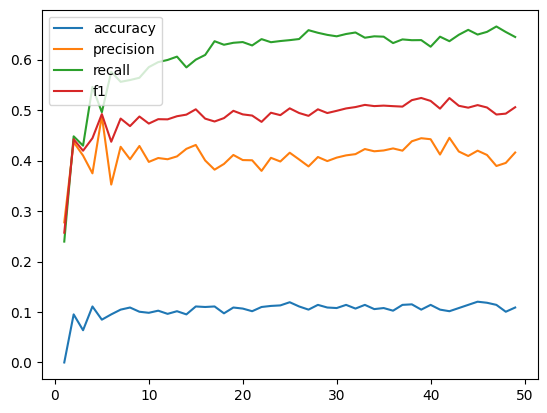

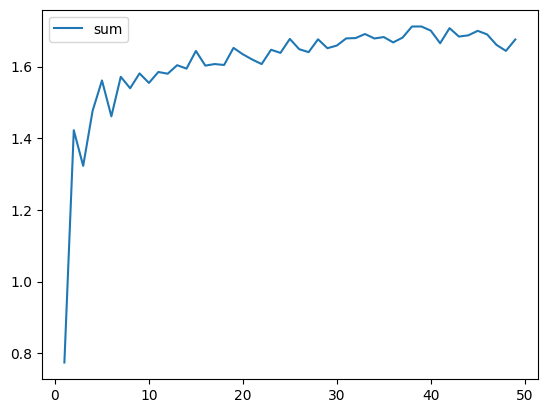

In [51]:
# Plot metrics
import matplotlib.pyplot as plt
# First - plot all four metrics on 1 plot

# Then - plot sum of metrics on another plot
plt.plot(range(1, max_k), accuracy_values, label='accuracy')
plt.plot(range(1, max_k), precision_values, label='precision')
plt.plot(range(1, max_k), recall_values, label='recall')
plt.plot(range(1, max_k), f1_values, label='f1')
plt.legend()
plt.show()
plt.plot(range(1, max_k), sum_values, label='sum')
plt.legend()
plt.show()

In [32]:
# ###
# Another solution that works without downgrading sklearn was proposed by poojasethi, it is only necessary to update a single line in the skmultilearn package.
# 
# I am using Anaconda, so the file I editted was found in: C:\Users\dudel\anaconda3\envs\unpr_fp_env_pd\Lib\site-packages\skmultilearn\adapt\mlknn.py , line 165.
# 
# Specifically, old line 165:
# 
# self.knn_ = NearestNeighbors(self.k).fit(X)
# should be updated to:
# 
# self.knn_ = NearestNeighbors(n_neighbors=self.k).fit(X)
# PS: You might have to restart the kernel when reloading the package to avoid this error.
# ###

In [52]:
best_k = 28
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MLkNN(k=best_k))
])
# Fit
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MLkNN(k=28))])

In [53]:
# Predict

# Get 1 random movie
movie = df.sample(1)
print(movie['title'].values[0])
print(movie['overview'].values[0])
print(movie['genres'].values[0])

Trainspotting
Renton, deeply immersed in the Edinburgh drug scene, tries to clean up and get out, despite the allure of the drugs and influence of friends.
['Drama', 'Crime']


In [54]:
# Predict genres
pred_res = pipeline.predict([movie['overview'].values[0]])
print(pred_res)
print(mlb.inverse_transform(pred_res))

  (0, 0)	1
  (0, 6)	1
[('Action', 'Drama')]


In [59]:
from skmultilearn.ensemble import RakelD

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RakelD(base_classifier=LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced'), base_classifier_require_dense=[True, True], labelset_size=20))
])
# Fit
pipeline.fit(x_train, y_train)
# Get metrics
y_pred = pipeline.predict(X_test)
print('Accuracy: ', accuracy_score(y_pred, mlb.transform(Y_test)))
print('Precision: ', precision_score(y_pred, mlb.transform(Y_test), average='micro'))
print('Recall: ', recall_score(y_pred, mlb.transform(Y_test), average='micro'))
print('F1: ', f1_score(y_pred, mlb.transform(Y_test), average='micro'))
sum = accuracy_score(y_pred, mlb.transform(Y_test)) + precision_score(y_pred, mlb.transform(Y_test), average='micro') + recall_score(y_pred, mlb.transform(Y_test), average='micro') + f1_score(y_pred, mlb.transform(Y_test), average='micro')
print('Sum: ', sum)
accuracy_values.append(accuracy_score(y_pred, mlb.transform(Y_test)))
precision_values.append(precision_score(y_pred, mlb.transform(Y_test), average='micro'))
recall_values.append(recall_score(y_pred, mlb.transform(Y_test), average='micro'))
f1_values.append(f1_score(y_pred, mlb.transform(Y_test), average='micro'))
sum_values.append(sum)
print()

Accuracy:  0.013612565445026177
Precision:  0.433832456495346
Recall:  0.31045467709238345
F1:  0.36191762322754895
Sum:  1.1198173222603045


In [65]:
# Predict

# Get 1 random movie
movie = df.sample(1)
print(movie['title'].values[0])
print(movie['overview'].values[0])
print(movie['genres'].values[0])

# Predict genres
pred_res = pipeline.predict([movie['overview'].values[0]])
print(pred_res)
print(mlb.inverse_transform(pred_res))

Eat Pray Love
Liz Gilbert had everything a modern woman is supposed to dream of having – a husband, a house and a successful career – yet like so many others, she found herself lost, confused and searching for what she really wanted in life. Newly divorced and at a crossroads, Gilbert steps out of her comfort zone, risking everything to change her life, embarking on a journey around the world that becomes a quest for self-discovery. In her travels, she discovers the true pleasure of nourishment by eating in Italy, the power of prayer in India and, finally and unexpectedly, the inner peace and balance of true love in Bali.
['Drama']
  (0, 0)	1
  (0, 3)	1
  (0, 4)	1
  (0, 19)	1
[('Action', 'Comedy', 'Crime', 'Western')]
